# Seminar Work - NLP Part
   ### Petr Hrobar, Filip Hron, Veronika Sulakova, Barbora Kupkova

#### Importing of all needed modules

In [5]:
# Importing all modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Style for plots
sns.set()

# Random seed for replicability
np.random.seed(101)

#### Loading The Dataset (we use only 25% for the sake of speed)

In [6]:
# load the data and subset it 
df = pd.read_csv('Hotel_Reviews.csv')

# Use only 25 percents of observations
df = df.sample(frac = 0.25).reset_index()

# Check one observation
df.head(1)

,index,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,314772,Doctor Carulla 25 Sarri St Gervasi 08017 Barce...,32,5/2/2016,9.2,Primero Primera,United Arab Emirates,Nothing The place was just perfect,8,261,Great location very clean rooms excellent foo...,24,7,10.0,"[' Leisure trip ', ' Couple ', ' Double or Twi...",458 day,41.400281,2.129743


#### What is the number of rown and columns of loaded dataset?

In [7]:
(f" Shape of the dataset is {df.shape}")

' Shape of the dataset is (128934, 18)'

#### What are the columns names

In [8]:
print(df.columns)

Index(['index', 'Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')


# EDA - Exploratory Data Analysis

#### What is the distribution of Reviews Scores

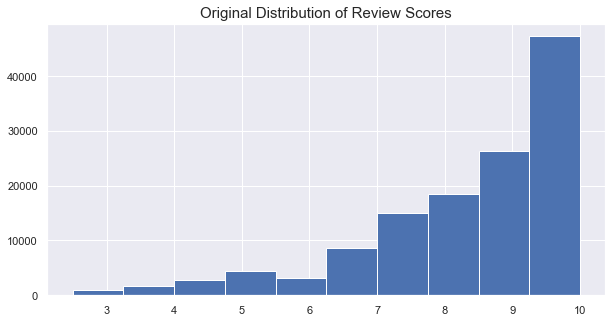

In [9]:
# Show reviews scores as a histogram 
df.Reviewer_Score.hist(figsize = (10, 5));

# Modify the image with title
plt.title('Original Distribution of Review Scores', size = 15);

#### We need to discretize the distribution - we will use quantiles

In [10]:
# Quantiles
quantiles = np.quantile(df.Reviewer_Score, q = [0.10, 0.25, 0.5, 0.75])

# Show us the bounds
print(quantiles)

[5.8 7.5 8.8 9.6]


#### What is the maximal and the minumal values of Review score?

In [11]:
print(
(f" Maximal Score is {df.Reviewer_Score.max()}"),
"\n",
(f" Minimal Score is {df.Reviewer_Score.min()}"))

 Maximal Score is 10.0 
  Minimal Score is 2.5


#### Discreatize the values

In [12]:
# Create a new columns
df["Reviewer_Score_discrete"] =  pd.cut(df["Reviewer_Score"], 
                   bins=[0, np.min(df["Reviewer_Score"]), 
                         
                         # Use Quantiles as the bounds
                         quantiles[0], 
                         quantiles[1], 
                         quantiles[2], np.max(df["Reviewer_Score"])],
                                        
                         # Label The intervals              
                   labels = ['VERY BAD', 'BAD', 'MEDIUM', 'GOOD', 'EXCELENT'])

#df["Reviewer_Score_discrete"]

#### Distribution of discretize review

D:\Python\envs\NLP_SEMINARKA_NEW\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


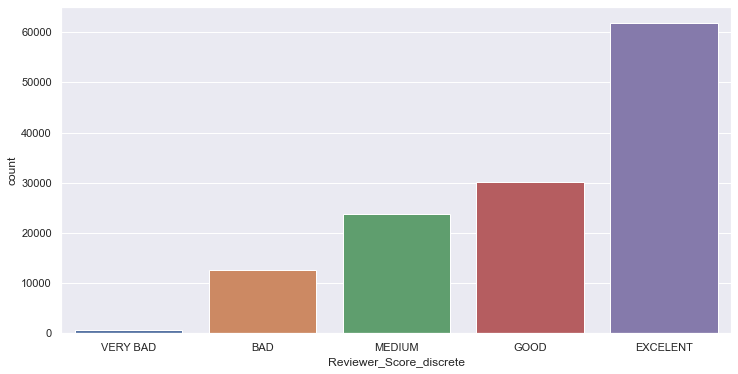

In [13]:
# For the figure size
figs, axes = plt.subplots(1, 1, figsize = (12, 6));

# bar plot of values
sns.countplot(df["Reviewer_Score_discrete"], ax = axes);

# Top 20 reviewed hotels based on the number of reviews

#### Aggregation - What are the hotels with the highest review score (top 15 - we also take into account number of reviews)

In [14]:
df_merged = (df.
 groupby('Hotel_Name').
 agg(n_hodnoceni = ('Total_Number_of_Reviews', np.size),
     mean_score = ('Reviewer_Score', np.mean),
     min_score = ('Reviewer_Score', np.min),
     max_score = ('Reviewer_Score', np.max)))

In [16]:
# Merging 
(df_merged
 .sort_values('mean_score', ascending=0)
 .sort_values(['n_hodnoceni', 'mean_score'], 
              ascending = [0, 0])).head(15)

,n_hodnoceni,mean_score,min_score,max_score
Hotel_Name,,,,
Britannia International Hotel Canary Wharf,1181,6.824047,2.5,10.0
Park Plaza Westminster Bridge London,1055,8.620664,2.5,10.0
Strand Palace Hotel,1055,8.115735,2.5,10.0
Copthorne Tara Hotel London Kensington,853,8.063775,2.5,10.0
DoubleTree by Hilton Hotel London Tower of London,799,8.656195,2.5,10.0
Holiday Inn London Kensington,700,7.770714,2.5,10.0
Grand Royale London Hyde Park,683,7.474671,2.5,10.0
Intercontinental London The O2,676,9.384763,3.3,10.0
Millennium Gloucester Hotel London,656,7.731098,2.5,10.0


# Do people with a positive Experience Tend to write a longer review (and vice-versa)?

In [17]:
# Create new columns based on the review length 
df["Pos_review_length"] = df.Positive_Review.str.len()
df["Neg_review_length"] = df.Negative_Review.str.len()

D:\Python\envs\NLP_SEMINARKA_NEW\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


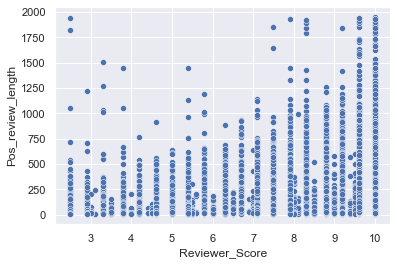

In [18]:
sns.scatterplot('Reviewer_Score', "Pos_review_length", data = df);

#### use Aggregation to calculate mean length of positive and negative review (for each hotel)

In [19]:
agg2 = (df
 .groupby('Hotel_Name')
 .agg(n = ('Reviewer_Score', np.size),
      mean_rev =('Reviewer_Score', np.mean),
      mean_length_of_feedback_pos = ('Pos_review_length', np.mean),
      mean_length_of_feedback_neg = ('Neg_review_length', np.mean)).reset_index())

D:\Python\envs\NLP_SEMINARKA_NEW\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\Python\envs\NLP_SEMINARKA_NEW\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


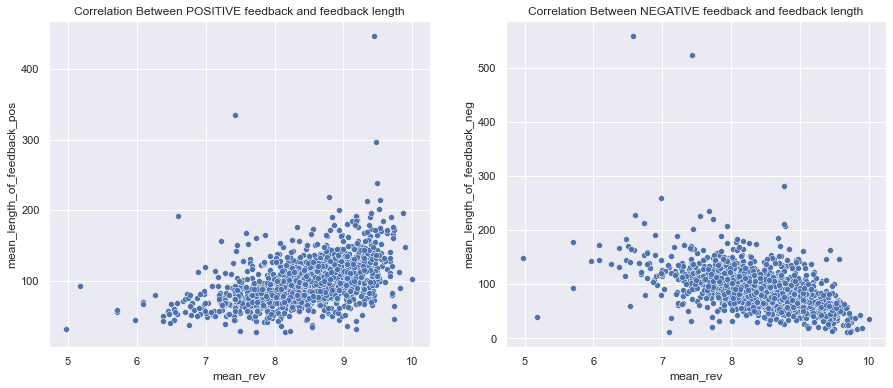

In [20]:
# Create grid for multiple plots
figs, axes = plt.subplots(1, 2, figsize = (15, 6))


# First plot
a = axes[0]
sns.scatterplot('mean_rev', 'mean_length_of_feedback_pos', data = agg2, ax = a);
a.set_title("Correlation Between POSITIVE feedback and feedback length");

# Second PLot
a = axes[1]
sns.scatterplot('mean_rev', 'mean_length_of_feedback_neg', data = agg2, ax = a);
a.set_title("Correlation Between NEGATIVE feedback and feedback length");

# Interesting Text columns

In [21]:
df.head(1)

,index,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,...,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Reviewer_Score_discrete,Pos_review_length,Neg_review_length
0,314772,Doctor Carulla 25 Sarri St Gervasi 08017 Barce...,32,5/2/2016,9.2,Primero Primera,United Arab Emirates,Nothing The place was just perfect,8,261,...,24,7,10.0,"[' Leisure trip ', ' Couple ', ' Double or Twi...",458 day,41.400281,2.129743,EXCELENT,140,36


### What are the columns containing Text values?

In [22]:
df.loc[:, ['Positive_Review', 'Negative_Review', 'Tags']]

,Positive_Review,Negative_Review,Tags
0,Great location very clean rooms excellent foo...,Nothing The place was just perfect,"[' Leisure trip ', ' Couple ', ' Double or Twi..."
1,The Hotel was situated in the old part of Bar...,No Negative,"[' Leisure trip ', ' Couple ', ' Classic Doubl..."
2,Staff was very friendly and accommodating Max...,Parking is the biggest issue,"[' Leisure trip ', ' Couple ', ' Dorsett Doubl..."
3,The linens were super soft The bathroom was m...,No Negative,"[' Leisure trip ', ' Family with older childre..."
4,The room was amazing The bed was comfortable ...,Nothing it was perfect,"[' Leisure trip ', ' Couple ', ' Deluxe King R..."
...,...,...,...
128929,Clean modern and classy,The staff weren t very involved with our stay...,"[' Leisure trip ', ' Couple ', ' Large Double ..."
128930,Close to everything you need to see and do in...,No Negative,"[' Leisure trip ', ' Family with young childre..."
128931,amazing staff good food facility wifi near th...,toilet is very small,"[' Leisure trip ', ' Group ', ' Classic Twin R..."
128932,WOW What to say I loved everything This place...,N A,"[' Leisure trip ', ' Solo traveler ', ' Double..."


#### Discretize values of review contain 'Medium' group - since this group is hard to work with we have decided to frop it.

In [23]:
# Drop the medium values

# Number of rows before dropping it
print(f'Before dropping Medium values we had {df.shape[0]} observations')

# Drop the columns
df = df.loc[(df.loc[:, 'Reviewer_Score_discrete'] != 'MEDIUM'), :].reset_index()

# NUmber of rows after dropping it
print(f'Now we have {df.shape[0]} observations')

df.head(1)

Before dropping Medium values we had 128934 observations
Now we have 105235 observations


,level_0,index,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,...,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Reviewer_Score_discrete,Pos_review_length,Neg_review_length
0,0,314772,Doctor Carulla 25 Sarri St Gervasi 08017 Barce...,32,5/2/2016,9.2,Primero Primera,United Arab Emirates,Nothing The place was just perfect,8,...,24,7,10.0,"[' Leisure trip ', ' Couple ', ' Double or Twi...",458 day,41.400281,2.129743,EXCELENT,140,36


# Create Final 2-level evaluation of the hotel - Positive, Negative

#### As we can see - now we have 4 unique cathegories.

In [24]:
df.Reviewer_Score_discrete.unique()

['EXCELENT', 'GOOD', 'BAD', 'VERY BAD']
Categories (4, object): ['VERY BAD' < 'BAD' < 'GOOD' < 'EXCELENT']

In [25]:
# One way to to perform converting

#df['Final_Jugment'] = [{"POSITIVE": y in ['EXCELENT', 'GOOD'], "NEGATIVE": y in ['BAD', 'VERY BAD']} for y in df.Reviewer_Score_discrete]
#df['Final_Jugment']

#### Reduce number of cathegoies into 2.

In [26]:
df['coded'] = df['Reviewer_Score_discrete'].apply(lambda x: 'GOOD' if x in ['EXCELENT', 'GOOD'] else 'BAD')
df['coded'].value_counts()

GOOD    92080
BAD     13155
Name: coded, dtype: int64

#### Are distibutions equal?

D:\Python\envs\NLP_SEMINARKA_NEW\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


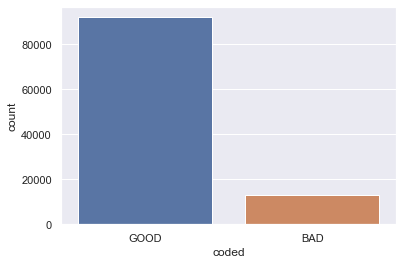

In [27]:
sns.countplot(df['coded']);

# API GOOGLE service - Analysis with Hotel Reviews data set

In [51]:
# another packages for text analysis
from google.cloud import language_v1
from google.oauth2 import service_account

#### Connecting to API

In [55]:
creds = service_account.Credentials.from_service_account_file('./project-hrof01-239cf2bd85b2.json')

In [56]:
client = language_v1.LanguageServiceClient(credentials=creds)

In [57]:
# function definition for analysing text 
# based on lesson
def analyze_entity(text):
    language = "en"
    type_ = language_v1.Document.Type.PLAIN_TEXT
    encoding_type = language_v1.EncodingType.UTF8
    document = {"content": text, "type_": type_, "language": language}
    response = client.analyze_entities(request = {'document': document, 'encoding_type': encoding_type})
    return response

### Analysis using API service and visualisation
#### Data preparation
 In this section, we divide data set into  *Negative* and *Positive* reviews. In addition, we shuffle reduced data and choose only 500 records for *N* and *P* reviews. 

In [58]:
max_rows = 500
# shuffle
df = df.sample(frac = 1)
# data frame for neg and pos separately 
response_NEG = df['Negative_Review'].iloc[0:max_rows]
response_POS = df['Positive_Review'].iloc[0:max_rows]


### API Analysis
 Now, we are able to utilize text analysis on *Positive* and *Negative* reviews. The goal is to find entities in every single review. Furthermore, we will be able to find out, what kind of entities are common for reviews and compare them.


In [59]:
# Create an empty dataframes
df_res_POS = pd.DataFrame()
df_res_NEG = pd.DataFrame()
# for every single sentence we safe all entities and their score
i = 0
for veta in response_POS:
    for entity in analyze_entity(veta).entities:
        df_res_POS.loc[i, 'TYPE'] = str(language_v1.Entity.Type(entity.type_).name)
        df_res_POS.loc[i, 'SCORE'] = float(entity.salience)
        df_res_POS.loc[i, 'COUNT'] = 1
        i = i + 1 
        

# for every single sentence we safe all entities and their score
i = 0
for veta in response_NEG:
    for entity in analyze_entity(veta).entities:
        df_res_NEG.loc[i, 'TYPE'] = str(language_v1.Entity.Type(entity.type_).name)
        df_res_NEG.loc[i, 'SCORE'] = float(entity.salience)
        df_res_NEG.loc[i, 'COUNT'] = 1
        i = i + 1 

After entities analysis, It is appropriate to filter out  "OTHER" entities. ( Hard to interpret their impact and meaning in reviews. ) 

In [60]:
# Filtering OTHER ent.
df_res_POS_1 = df_res_POS[(df_res_POS.TYPE != "OTHER")]
df_res_NEG_1 = df_res_NEG[(df_res_NEG.TYPE != "OTHER")]

### Visualization of *Scoring*     

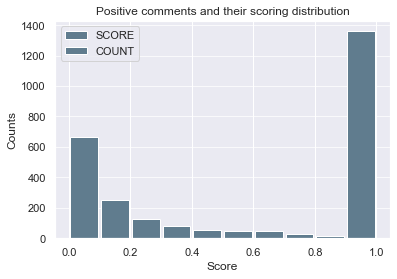

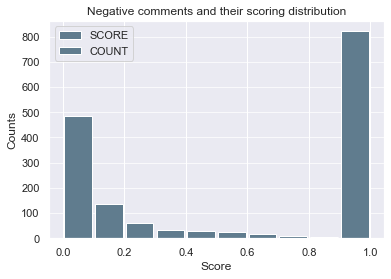

In [61]:
df_res_POS_1.plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title('Positive comments and their scoring distribution')
plt.xlabel('Score')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

df_res_NEG_1.plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title('Negative comments and their scoring distribution')
plt.xlabel('Score')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

### Visualization of entities groups and their comparasion. 
 In this section, we use *"OTHER"* in visualisation.

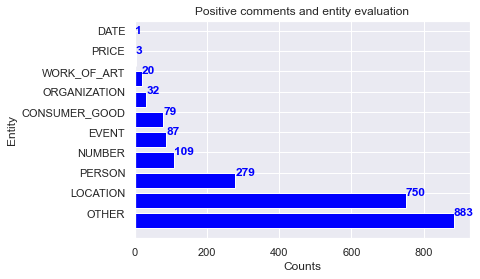

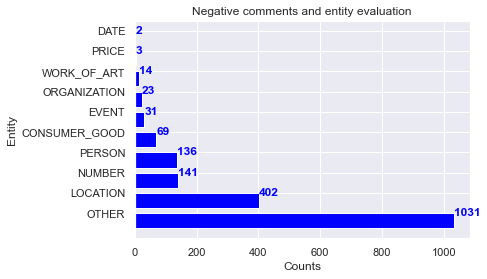

In [62]:
# Counts for groups 
a = df_res_POS.TYPE.value_counts()
b = df_res_NEG.TYPE.value_counts()

x = list(a.index)
y = list(a)

x_1 = list(b.index)
y_1 = list(b)

# plot Positive
fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v + .25, i + .25, str(v), color='blue', fontweight='bold') #add value labels into bar
plt.title('Positive comments and entity evaluation')
plt.xlabel('Counts')
plt.ylabel('Entity')

# plot Negative
fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y_1))  # the x locations for the groups
ax.barh(ind, y_1, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x_1, minor=False)
for i, v in enumerate(y_1):
    ax.text(v + .25, i + .25, str(v), color='blue', fontweight='bold') #add value labels into bar
plt.title('Negative comments and entity evaluation')
plt.xlabel('Counts')
plt.ylabel('Entity')
plt.show()

# Creating Dataset for a Classification Algorithm

In [28]:
# SAve values based on the cathegory
df_neg = df[df.coded=="BAD"]
df_pos = df[df.coded=="GOOD"]
#df_pos

In [29]:
# SAmple NUmber from possitive 
df_pos = df_pos.sample(df_neg.shape[0])

# MErge new filtered positive and negative
df_prepared = pd.concat([df_pos, df_neg], ignore_index=1)
df_prepared["cats"] = [{"GOOD": y=="GOOD", "BAD": y=="BAD"} for y in df_prepared.coded]
df_prepared.head(2)

,level_0,index,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,...,Reviewer_Score,Tags,days_since_review,lat,lng,Reviewer_Score_discrete,Pos_review_length,Neg_review_length,coded,cats
0,86304,440895,Savoyenstra e 2 16 Ottakring 1160 Vienna Austria,86,6/26/2017,8.3,Austria Trend Hotel Schloss Wilhelminenberg Wien,Italy,No Negative,0,...,8.8,"[' Business trip ', ' Solo traveler ', ' Class...",38 days,NaN,NaN,GOOD,69,11,GOOD,"{'GOOD': True, 'BAD': False}"
1,19547,174979,4 Broad Court Bow Street Covent Garden Westmin...,294,1/11/2017,8.7,Fielding Hotel,United States of America,The usual price listed per night is high but ...,18,...,10.0,"[' Leisure trip ', ' Couple ', ' Double Room '...",204 day,51.513931,-0.121989,EXCELENT,224,77,GOOD,"{'GOOD': True, 'BAD': False}"


D:\Python\envs\NLP_SEMINARKA_NEW\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='coded', ylabel='count'>

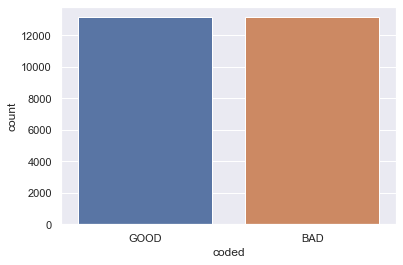

In [30]:
sns.countplot(df_prepared['coded'])

# Test-TRAIN split

In [31]:
# Shuffle the dataset
df_prepared = df_prepared.sample(frac=1)
df_prepared.shape

# Percentage of test/train ration
split = 0.8
split_row = int(len(df_prepared) * split)


df_test = df_prepared[split_row:]

df_train = df_prepared[:split_row]


train_data = list(zip(df_train["Positive_Review"], [{"cats": cats} for cats in df_train["cats"]]))

test_data = list(zip(df_test["Positive_Review"], [{"cats": cats} for cats in df_test["cats"]]))
f"Training Data have {df_train.shape[0]}, Testing Data have {df_test.shape[0]} rows of observations."

'Training Data have 21048, Testing Data have 5262 rows of observations.'

In [32]:
df_train

,level_0,index,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,...,Reviewer_Score,Tags,days_since_review,lat,lng,Reviewer_Score_discrete,Pos_review_length,Neg_review_length,coded,cats
475,111691,238738,7 Pepys Street City of London London EC3N 4AF ...,1936,3/28/2016,8.7,DoubleTree by Hilton Hotel London Tower of London,United Kingdom,Overtly expensive sky bar,5,...,10.0,"[' Leisure trip ', ' Couple ', ' Queen Room Mo...",493 day,51.510841,-0.078058,EXCELENT,20,26,GOOD,"{'GOOD': True, 'BAD': False}"
6613,13935,253433,81 Great Eastern Street Islington London EC2A ...,524,10/30/2016,9.0,The Hoxton Shoreditch,United Kingdom,No dressing gowns slippers or all night room ...,10,...,8.3,"[' Leisure trip ', ' Solo traveler ', ' Deluxe...",277 day,51.525514,-0.082927,GOOD,15,53,GOOD,"{'GOOD': True, 'BAD': False}"
21235,79696,130888,29 31 Gower Street Camden London WC1E 6HG Unit...,457,4/8/2017,6.8,Bloomsbury Palace Hotel,Italy,Struttura molto sporca La camera non corrispo...,45,...,5.0,"[' Family with young children ', ' Triple Room...",117 day,51.520795,-0.131084,BAD,18,272,BAD,"{'GOOD': False, 'BAD': True}"
12414,99389,248063,8 Northumberland Avenue Westminster Borough Lo...,409,8/28/2016,8.3,The Grand at Trafalgar Square,United Kingdom,No Negative,0,...,10.0,"[' Leisure trip ', ' Couple ', ' Small Queen R...",340 day,51.506935,-0.126012,EXCELENT,90,11,GOOD,"{'GOOD': True, 'BAD': False}"
2508,52651,27417,101 Buckingham Palace Road Westminster Borough...,838,6/19/2016,8.4,The Grosvenor,Spain,A little more luxury for the price and the ic...,13,...,8.3,"[' Leisure trip ', ' Couple ', ' Deluxe Double...",410 day,51.495666,-0.145279,GOOD,48,56,GOOD,"{'GOOD': True, 'BAD': False}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18940,57168,3429,1 3 Queens Garden Westminster Borough London W...,1058,4/9/2016,7.7,The Park Grand London Paddington,Saudi Arabia,Reaching room by stairs cause the left can bo...,13,...,5.4,"[' Leisure trip ', ' Group ', ' Deluxe Double ...",481 day,51.514218,-0.180903,BAD,81,62,BAD,"{'GOOD': False, 'BAD': True}"
15164,19764,444219,Scarsdale Place Kensington Kensington and Chel...,1831,11/22/2015,8.1,Copthorne Tara Hotel London Kensington,United Kingdom,The heating system need update,7,...,5.8,"[' Business trip ', ' Solo traveler ', ' Super...",620 day,51.499046,-0.191707,BAD,11,32,BAD,"{'GOOD': False, 'BAD': True}"
15506,23053,191144,44 Grosvenor Square Westminster Borough London...,806,10/8/2016,7.8,Millennium Hotel London Mayfair,United States of America,No heating even after handy man came to try t...,26,...,5.0,"[' Business trip ', ' Couple ', ' Standard Dou...",299 day,51.510574,-0.150995,BAD,11,126,BAD,"{'GOOD': False, 'BAD': True}"
17065,38525,214544,55 61 Westbourne Terrace Westminster Borough L...,791,9/19/2016,7.3,Shaftesbury Premier London Paddington,India,This hotel has cheated us We have paid for a ...,122,...,5.0,"[' Couple ', ' Deluxe Double Room ', ' Stayed ...",318 day,51.515367,-0.178327,BAD,11,554,BAD,"{'GOOD': False, 'BAD': True}"


# NLP ANALYSIS

In [33]:
import spacy
nlp = spacy.load("en_core_web_md") 

In [34]:
df_train.loc[:, ['Positive_Review', 'Negative_Review', 'Tags']]

,Positive_Review,Negative_Review,Tags
475,Excellent breakfast,Overtly expensive sky bar,"[' Leisure trip ', ' Couple ', ' Queen Room Mo..."
6613,Location staff,No dressing gowns slippers or all night room ...,"[' Leisure trip ', ' Solo traveler ', ' Deluxe..."
21235,Solo la posizione,Struttura molto sporca La camera non corrispo...,"[' Family with young children ', ' Triple Room..."
12414,Excellent location lovely nice clean modern r...,No Negative,"[' Leisure trip ', ' Couple ', ' Small Queen R..."
2508,Location very convenient for planned excursions,A little more luxury for the price and the ic...,"[' Leisure trip ', ' Couple ', ' Deluxe Double..."
...,...,...,...
18940,Without contac me They have to put me in diff...,Reaching room by stairs cause the left can bo...,"[' Leisure trip ', ' Group ', ' Deluxe Double ..."
15164,No Positive,The heating system need update,"[' Business trip ', ' Solo traveler ', ' Super..."
15506,No Positive,No heating even after handy man came to try t...,"[' Business trip ', ' Couple ', ' Standard Dou..."
17065,No Positive,This hotel has cheated us We have paid for a ...,"[' Couple ', ' Deluxe Double Room ', ' Stayed ..."


#### Show us Randomly selected k (k = 2) positive and negative reviews.

In [35]:
import random

# Type of reviews
positive = [_ for _  in df_train.Positive_Review]
negative = [_ for _  in df_train.Negative_Review]

# how many to show
k = 2

print(f"Positive reviews - random {k} sentences")
print()
print(random.choices(positive, k = k))

print()
print()

print(f"Negative reviews - random {k} sentences")
print()
print(random.choices(negative, k = k))

Positive reviews - random 2 sentences

['No Positive', ' Location and quietness of the eara']


Negative reviews - random 2 sentences

[' Difficult to get to 1st nite of stay air conditioning unit wasn t working so made the nite a very difficult sleep Second nite after requesting engineer to fix the air conditioning My room had a water leak and had to move rooms midnight of our last night No concerns from the staff no help for bags to be assisted in moving rooms No complimentary offers Had to complain to stand in supervisor who seemed unhelpful till I said I know the CEO of Hilton hotels Overall hotel stay was not the best The hotel itself was pleasant but the service given was not good at all and left a bad taste in our mouths ', ' No water to our 2nd floor room water pressure problem for whole premises ']


#### Show us the structure of one randomly seelcted bad review

In [36]:
from spacy import displacy

# Help founded here: https://www.journaldev.com/23674/python-remove-character-from-string

AA = str(random.choices(negative, k = 1))
AA = AA.translate({ord(i): None for i in '"[]\''})

Negative = nlp(AA)

displacy.render(Negative)

#### Iterate over word in the sentence and give us their meaning

In [37]:
for i in Negative:
    if i.pos_ != 'SPACE':
            print(i, i.pos_, i.dep_)

Everthing NOUN nsubj
is AUX ROOT
so ADV advmod
bad ADJ acomp
The DET det
room NOUN nsubj
is AUX ROOT
very ADV advmod
small ADJ amod
Breakfast PROPN nsubj
is AUX ccomp
poorly ADV advmod
There PRON expl
is AUX ROOT
a DET det
no DET neg
garson PROPN pobj
breakfast NOUN compound
time NOUN attr
Here ADV advmod
is AUX relcl
like SCONJ prep
4 NUM nummod
star NOUN compound
hotel NOUN pobj


In [38]:
train_data[:3]

[(' Excellent breakfast', {'cats': {'GOOD': True, 'BAD': False}}),
 (' Location staff', {'cats': {'GOOD': True, 'BAD': False}}),
 (' Solo la posizione', {'cats': {'GOOD': False, 'BAD': True}})]

In [39]:
textcat = nlp.create_pipe("textcat",
                          config={"exclusive_classes": True,
                                  "architecture": "simple_cnn"})

In [40]:
nlp.add_pipe(textcat, last=True)

In [41]:
textcat.add_label("GOOD")
textcat.add_label("BAD")

textcat.labels # výpis pro ověření

('GOOD', 'BAD')

In [42]:
from spacy.util import minibatch, compounding

In [43]:
batch_sizes = compounding(1.0, 32.0, 1.5)
for x in range(12): print(next(batch_sizes))

1.0
1.5
2.25
3.375
5.0625
7.59375
11.390625
17.0859375
25.62890625
32.0
32.0
32.0


In [44]:
batch_sizes = compounding(1.0, 4.0, 1.5)
for batch in minibatch(train_data[1:5], size=batch_sizes):
    print("\nbatch:", len(batch), batch)


batch: 1 [(' Location staff', {'cats': {'GOOD': True, 'BAD': False}})]

batch: 1 [(' Solo la posizione', {'cats': {'GOOD': False, 'BAD': True}})]

batch: 2 [(' Excellent location lovely nice clean modern rooms Great value for money well recommended ', {'cats': {'GOOD': True, 'BAD': False}}), (' Location very convenient for planned excursions', {'cats': {'GOOD': True, 'BAD': False}})]


### Classifier for BAD and GOOD score based on just positive reviews
Based on code above, we split data set on train and test sample with 80% rate.

We also use only *2* number of iteration, and dropout rate *75%*. 

In [45]:
# number of iteration and dropout rate
n_iter = 2
dropout = 0.75

In [47]:
# get names of other pipes to disable them during training
pipe_exceptions = ["textcat"] #, "trf_wordpiecer", "trf_tok2vec"
other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

In [48]:
from sklearn import metrics # funkce pro skóring
import matplotlib.pyplot as plt # pro přístup k zobrazování grafu v iteracích
import numpy as np # numpy pro generování náhodných čísel


#### Model calculation based on lecture code

In [49]:
score = pd.DataFrame() # dataframe pro výsledky
print("trénink", end="") # začátek tisku průběhu na řádek

with nlp.disable_pipes(other_pipes):  # s dočasně vypnutými ostatními pipes
    
    optimizer = nlp.begin_training() # vytvoření optimalizátoru    
    
    for i in range(n_iter): # iterace přes celou tréninkovou množinu (epocha)
        print(".", end="") # tisk průběhu další iterace na řádek
        losses = {} # příprava pro ukládání informací o ztrátách        
        random.shuffle(train_data) # zamíchání tréninkovou množinou
        
        batch_sizes = compounding(8.0, 40.0, 1.2) # inicializace počtu příkladů ve várkách
        batches = minibatch(train_data, size=batch_sizes) # načtení příkladů ve várkách
        
        for batch in batches: # učení se na každé várce 
            texts, annotations = zip(*batch) # uložení polí dvojic do dvou separátních polí
            
            nlp.update(texts, annotations, sgd=optimizer, drop=dropout, losses=losses) # samotné učení
        
        with textcat.model.use_params(optimizer.averages): # s dočasnou aplikací aktualizovaného modelu
            scorer = nlp.evaluate(test_data) # evaluace modelu na testovacích datech
            
            # vyplnění tabulky se skórem modelu v iteraci
            score.loc[i, "loss"] = losses["textcat"] # zapsání končené ztráty do tabulky
            score.loc[i,"F"] = scorer.textcat_score            
            score.loc[i,"P+"] = scorer.textcats_per_cat["GOOD"]["p"]
            score.loc[i,"R+"] = scorer.textcats_per_cat["GOOD"]["r"]
            score.loc[i,"F+"] = scorer.textcats_per_cat["GOOD"]["f"]
            score.loc[i,"P-"] = scorer.textcats_per_cat["GOOD"]["p"]
            score.loc[i,"R-"] = scorer.textcats_per_cat["GOOD"]["r"]
            score.loc[i,"F-"] = scorer.textcats_per_cat["GOOD"]["f"]
            
            #alternativní skórování pomocí ROC a balíčku sklearn
            docs_generator = nlp.pipe(df_test["Positive_Review"]) # dávkové zpracování testovacích dokumentů
            docs = list(docs_generator) # načtení testovacích dokumentů do listu
            scores = [doc.cats["GOOD"] for doc in docs] # načtení sentimentu do listu
            
            # kalkulace ROC
            fpr, tpr, thresholds = metrics.roc_curve(y_true = df_test["coded"], 
                                                     y_score = scores, 
                                                     pos_label = "GOOD")
            
            # vyplnění tabulky se skórem modelu v iteraci
            score.loc[i,"AUC"] = metrics.auc(fpr, tpr)
            

trénink..

### ROC curve Visualization

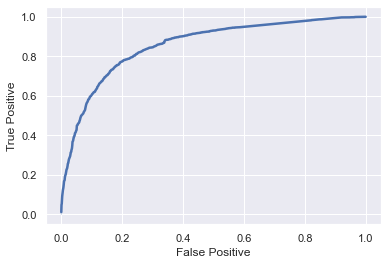

In [50]:
#alternativní skórování pomocí ROC a balíčku sklearn
docs_generator = nlp.pipe(df_test["Positive_Review"]) # dávkové zpracování testovacích dokumentů
docs = list(docs_generator) # načtení testovacích dokumentů do listu
scores = [doc.cats["GOOD"] for doc in docs] # načtení sentimentu do listu

# kalkulace ROC
fpr, tpr, thresholds = metrics.roc_curve(y_true = df_test["coded"], 
                                         y_score = scores, 
                                         pos_label = "GOOD")

# zobrazení ROC grafu
roc_plot = sns.lineplot(x=fpr, y=tpr, linewidth=2.5)
roc_plot.set(xlabel='False Positive', ylabel='True Positive')
plt.show() # zobrazení křivky za běhu buňky